In [182]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import datetime
import warnings
warnings.filterwarnings('ignore')


df_claim=pd.read_excel('/content/drive/MyDrive/SWISS_RE/claims.xlsx')
df_pd = pd.read_excel('/content/drive/MyDrive/SWISS_RE/pd.xlsx')
df_policy = pd.read_excel('/content/drive/MyDrive/SWISS_RE/policies.xlsx')

In [184]:
df_claim.head()

,an_policy_key,total_incurred
0,IF.IF19865.1,-64594216.39
1,IF.IF29019.1,-44732093.02
2,IF.IF32519.1,-29659325.24
3,IF.IF27807.1,-22938056.80
4,IF.IF26594.1,-21600000.00


In [185]:
df_pd.head()

,rating,PD_1_year,Cumulative_PD_2_year,Cumulative_PD_3_year,Cumulative_PD_4_year,Cumulative_PD_5_year,Cumulative_PD_6_year,Cumulative_PD_7_year,Cumulative_PD_8_year,Cumulative_PD_9_year,...,Cumulative_PD_21_year,Cumulative_PD_22_year,Cumulative_PD_23_year,Cumulative_PD_24_year,Cumulative_PD_25_year,Cumulative_PD_26_year,Cumulative_PD_27_year,Cumulative_PD_28_year,Cumulative_PD_29_year,Cumulative_PD_30_year
0,AAA,0.000636,0.001732,0.004707,0.009555,0.016519,0.023435,0.030302,0.037120,0.043891,...,0.121519,0.127697,0.133830,0.139921,0.145969,0.151974,0.157937,0.163858,0.169738,0.175576
1,AA+,0.000752,0.001999,0.005310,0.010607,0.018108,0.025553,0.032941,0.040274,0.047550,...,0.130684,0.137276,0.143817,0.150308,0.156751,0.163144,0.169489,0.175786,0.182036,0.188237
2,AA,0.000819,0.002145,0.005636,0.011167,0.018947,0.026665,0.034323,0.041920,0.049458,...,0.135416,0.142218,0.148967,0.155663,0.162305,0.168896,0.175435,0.181922,0.188358,0.194744
3,AA-,0.000935,0.002433,0.006268,0.012244,0.020544,0.028774,0.036936,0.045028,0.053053,...,0.144247,0.151438,0.158569,0.165639,0.172651,0.179603,0.186497,0.193332,0.200111,0.206832
4,A+,0.001512,0.003713,0.008947,0.016664,0.026937,0.037103,0.047162,0.057116,0.066966,...,0.177441,0.186034,0.194538,0.202952,0.211279,0.219518,0.227672,0.235740,0.243724,0.251625


In [186]:
df_policy.head()

,an_policy_key,transaction_id,source_system,insured_id,industry_segment,country_code,new_renewed,inception_date,policy_term_in_days,gross_written_premium,...,expected_loss,internal_expenses,external_expenses,potential_credit_exposure_usd,net_credit_exposure_usd,estimated_credit_exp_usd,average_tenor,remaining_tenor,premium_rate,costing_rating
0,IF.IF10036.1,10036,IF,754641,Professional & Financial services,F,New,2011-01-25,1616,275661.260,...,27297.7824,11273.4692,300751.1710,8636250.00,8636250.00,8636250.00,4.338849,0.0,0.007065,BB-
1,IF.IF10040.1,10040,IF,754641,Professional & Financial services,F,New,2011-01-25,882,235301.920,...,20665.6226,9407.4218,22972.2584,14393750.00,14393750.00,14393750.00,2.368110,0.0,0.006630,BB
2,IF.IF10376.1,10376,IF,6223194,Life sciences,N,New,2011-01-18,986,161341.320,...,49160.5828,18506.6238,253820.3724,8329990.20,8329990.20,8329990.20,2.647342,0.0,0.007027,BB-
3,IF.IF10398.1,10398,IF,162024,Professional & Financial services,U,New,2011-03-31,1827,1362827.367,...,291247.0428,65345.8316,350080.7548,16835598.36,16835598.36,16835598.36,4.905370,0.0,0.015849,BB+
4,IF.IF10457.1,10457,IF,196326,Life sciences,G,New,2011-01-13,904,517618.360,...,86686.7134,30796.4314,237157.5108,4838750.00,4838750.00,4838750.00,2.427178,0.0,0.042328,B


In [188]:
merged_df = pd.merge(df_policy,df_claim,on='an_policy_key',how='left')
df_pd.rename(columns={'rating':'costing_rating','PD_1_year':'Cumulative_PD_1_year'},inplace=True)
merged_df = pd.merge(merged_df,df_pd,on='costing_rating',how='left')

In [189]:
#Remove invalid transactions
print("No of transactions having policy_term_in_days<=0 are:",len(merged_df[merged_df['policy_term_in_days'] <= 0]))
print("No of transactions having gross_written_premium<=0 or net_written_premium<=0 are:",len(merged_df[(merged_df['gross_written_premium'] <= 0) | (merged_df['net_written_premium']<=0)]))
print("before removing these invalid transaction shape of merged_df: ",merged_df.shape)
condition = (merged_df['policy_term_in_days'] <= 0) | (merged_df['gross_written_premium'] <= 0) | (merged_df['net_written_premium']<=0)
merged_df = merged_df.drop(merged_df[condition].index)
print("After removing invalid transactions shape of merged_df: ",merged_df.shape)


No of transactions having policy_term_in_days<=0 are: 2
No of transactions having gross_written_premium<=0 or net_written_premium<=0 are: 19
before removing these invalid transaction shape of merged_df:  (6282, 56)
After removing invalid transactions shape of merged_df:  (6262, 56)


In [190]:
#check if there is any duplicate transaction
merged_df['an_policy_key'].duplicated().any()

False

In [191]:
print("Columns of merged_df are: ",merged_df.columns)

Columns of merged_df are:  Index(['an_policy_key', 'transaction_id', 'source_system', 'insured_id',
       'industry_segment', 'country_code', 'new_renewed', 'inception_date',
       'policy_term_in_days', 'gross_written_premium', 'net_written_premium',
       'gross_written_commission', 'risk_capital', 'capital_costs',
       'final_profit', 'expected_loss', 'internal_expenses',
       'external_expenses', 'potential_credit_exposure_usd',
       'net_credit_exposure_usd', 'estimated_credit_exp_usd', 'average_tenor',
       'remaining_tenor', 'premium_rate', 'costing_rating', 'total_incurred',
       'Cumulative_PD_1_year', 'Cumulative_PD_2_year', 'Cumulative_PD_3_year',
       'Cumulative_PD_4_year', 'Cumulative_PD_5_year', 'Cumulative_PD_6_year',
       'Cumulative_PD_7_year', 'Cumulative_PD_8_year', 'Cumulative_PD_9_year',
       'Cumulative_PD_10_year', 'Cumulative_PD_11_year',
       'Cumulative_PD_12_year', 'Cumulative_PD_13_year',
       'Cumulative_PD_14_year', 'Cumulative_PD_1

In [192]:
#Preporcessing and new feature addition
def set_pd(df):
  df['pd'] = None
  for index, row in df.iterrows():
      age_in_year = row['policy_Age_in_yr']
      col_name = f'Cumulative_PD_{age_in_year}_year'
      df.at[index, 'pd'] = row[col_name]
  return df

merged_df['claim_status'] = np.where(merged_df['total_incurred'].notnull(),1,0)
merged_df['policy_Age_in_yr'] = merged_df['policy_term_in_days'].apply(lambda x: math.ceil(x/365))
merged_df = set_pd(merged_df)

merged_df['premium_per_day'] = merged_df['net_written_premium'] / merged_df['policy_term_in_days']
merged_df['risk_exposure'] = merged_df['net_written_premium'] * merged_df['remaining_tenor']
merged_df['tenor_ratio'] = merged_df['remaining_tenor'] / merged_df['average_tenor']
average_premium_by_industry = merged_df.groupby('industry_segment')['net_written_premium'].transform('mean')
merged_df['premium_vs_average'] = merged_df['net_written_premium'] - average_premium_by_industry
print("Columns of merged_df after addition and removal of features: ",merged_df.columns)


Columns of merged_df after addition and removal of features:  Index(['an_policy_key', 'transaction_id', 'source_system', 'insured_id',
       'industry_segment', 'country_code', 'new_renewed', 'inception_date',
       'policy_term_in_days', 'gross_written_premium', 'net_written_premium',
       'gross_written_commission', 'risk_capital', 'capital_costs',
       'final_profit', 'expected_loss', 'internal_expenses',
       'external_expenses', 'potential_credit_exposure_usd',
       'net_credit_exposure_usd', 'estimated_credit_exp_usd', 'average_tenor',
       'remaining_tenor', 'premium_rate', 'costing_rating', 'total_incurred',
       'Cumulative_PD_1_year', 'Cumulative_PD_2_year', 'Cumulative_PD_3_year',
       'Cumulative_PD_4_year', 'Cumulative_PD_5_year', 'Cumulative_PD_6_year',
       'Cumulative_PD_7_year', 'Cumulative_PD_8_year', 'Cumulative_PD_9_year',
       'Cumulative_PD_10_year', 'Cumulative_PD_11_year',
       'Cumulative_PD_12_year', 'Cumulative_PD_13_year',
       'Cumul

In [193]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6262 entries, 0 to 6281
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   an_policy_key                  6262 non-null   object        
 1   transaction_id                 6262 non-null   object        
 2   source_system                  6262 non-null   object        
 3   insured_id                     6262 non-null   object        
 4   industry_segment               6262 non-null   object        
 5   country_code                   6262 non-null   object        
 6   new_renewed                    6262 non-null   object        
 7   inception_date                 6262 non-null   datetime64[ns]
 8   policy_term_in_days            6262 non-null   int64         
 9   gross_written_premium          6262 non-null   float64       
 10  net_written_premium            6262 non-null   float64       
 11  gross_written_com

In [194]:
merged_df.describe()

,policy_term_in_days,gross_written_premium,net_written_premium,gross_written_commission,risk_capital,capital_costs,final_profit,expected_loss,internal_expenses,external_expenses,...,Cumulative_PD_27_year,Cumulative_PD_28_year,Cumulative_PD_29_year,Cumulative_PD_30_year,claim_status,policy_Age_in_yr,premium_per_day,risk_exposure,tenor_ratio,premium_vs_average
count,6262.000000,6.262000e+03,6.262000e+03,6.262000e+03,6.262000e+03,6262.000000,6.262000e+03,6.262000e+03,6.262000e+03,6.262000e+03,...,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6.262000e+03,6262.000000,6.262000e+03
mean,1111.130310,2.811984e+05,2.119369e+05,5.860919e+04,1.291227e+05,5533.200827,7.323244e+04,4.980133e+04,4.645497e+04,7.094839e+04,...,0.442910,0.455003,0.466807,0.478328,0.043596,3.560045,161.769170,6.252934e+05,0.162528,0.000000e+00
std,848.340798,8.475861e+05,6.373214e+05,2.123126e+05,4.607334e+05,19219.687561,3.087133e+05,1.771107e+05,1.367771e+05,2.150425e+05,...,0.115753,0.116655,0.117448,0.118138,0.204211,2.300078,359.971408,5.187667e+06,0.297794,6.262591e+05
min,1.000000,9.800000e-02,7.840000e-02,0.000000e+00,0.000000e+00,0.000000,-8.884057e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.157937,0.163858,0.169738,0.175576,0.000000,1.000000,0.000057,0.000000e+00,0.000000,-4.519183e+05
25%,582.000000,7.684008e+02,7.021504e+02,0.000000e+00,3.083987e+02,13.844950,-3.876292e+02,1.626506e+02,3.383793e+02,0.000000e+00,...,0.358934,0.370208,0.381284,0.392166,0.000000,2.000000,0.847794,0.000000e+00,0.000000,-2.863885e+05
50%,849.000000,5.610270e+03,5.196675e+03,0.000000e+00,2.869024e+03,125.783000,3.550785e+02,1.542780e+03,3.126817e+03,2.817549e+02,...,0.389754,0.401610,0.413235,0.424634,0.000000,3.000000,6.911882,0.000000e+00,0.000000,-8.782062e+04
75%,1465.000000,1.671052e+05,1.282009e+05,1.413913e+04,6.757982e+04,2945.137650,2.566771e+04,2.562739e+04,3.015021e+04,3.325034e+04,...,0.500713,0.514054,0.527038,0.539675,0.000000,5.000000,154.807770,7.974605e+02,0.253008,-6.511680e+04
max,9391.000000,2.147750e+07,1.610813e+07,5.369376e+06,2.041064e+07,816425.730400,8.939500e+06,7.252595e+06,4.509575e+06,4.577270e+06,...,0.861216,0.869278,0.876872,0.884025,1.000000,26.000000,4358.825560,1.482376e+08,2.738425,1.565621e+07


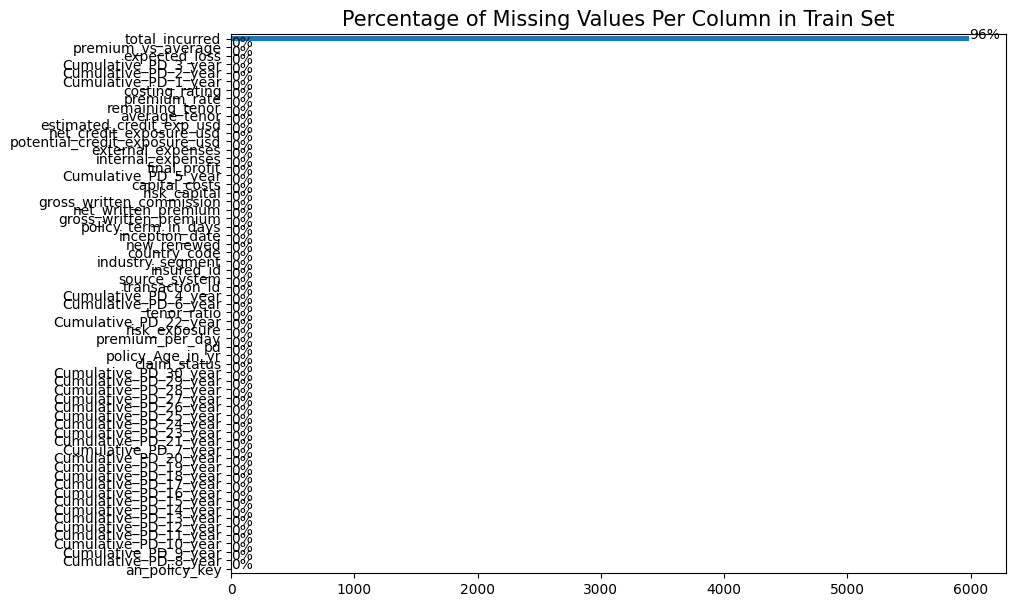

In [195]:
# Check if there any missing values
ax = merged_df.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/merged_df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [196]:
def fraction_unique(x):
    return len(merged_df[x].unique())
number_unique_vals = {x : fraction_unique(x) for x in merged_df.columns}
print("Unique values per columns:")
print(number_unique_vals)

Unique values per columns:
{'an_policy_key': 6262, 'transaction_id': 6262, 'source_system': 2, 'insured_id': 717, 'industry_segment': 5, 'country_code': 18, 'new_renewed': 2, 'inception_date': 1680, 'policy_term_in_days': 1752, 'gross_written_premium': 5671, 'net_written_premium': 5718, 'gross_written_commission': 1976, 'risk_capital': 6084, 'capital_costs': 5228, 'final_profit': 6128, 'expected_loss': 6034, 'internal_expenses': 6091, 'external_expenses': 4380, 'potential_credit_exposure_usd': 5138, 'net_credit_exposure_usd': 5141, 'estimated_credit_exp_usd': 5359, 'average_tenor': 2744, 'remaining_tenor': 892, 'premium_rate': 5886, 'costing_rating': 22, 'total_incurred': 267, 'Cumulative_PD_1_year': 21, 'Cumulative_PD_2_year': 21, 'Cumulative_PD_3_year': 21, 'Cumulative_PD_4_year': 21, 'Cumulative_PD_5_year': 21, 'Cumulative_PD_6_year': 21, 'Cumulative_PD_7_year': 21, 'Cumulative_PD_8_year': 21, 'Cumulative_PD_9_year': 21, 'Cumulative_PD_10_year': 21, 'Cumulative_PD_11_year': 21, 'Cum

No of transactions leading to claim(1) or not claimed(0)
0    5989
1     273
Name: claim_status, dtype: int64


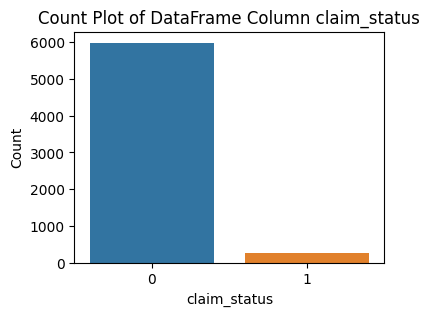

In [197]:
#Distribution of the target variable
print("No of transactions leading to claim(1) or not claimed(0)")
print(merged_df['claim_status'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data=merged_df, x='claim_status')
plt.title('Count Plot of DataFrame Column claim_status')
plt.xlabel('claim_status')
plt.ylabel('Count')
plt.show()

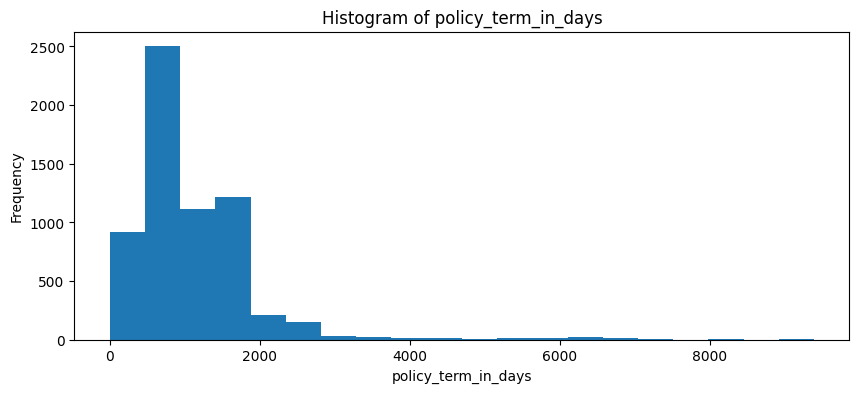

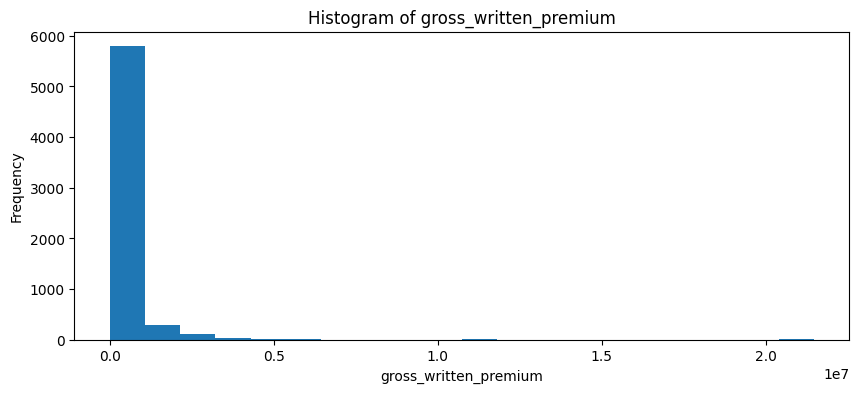

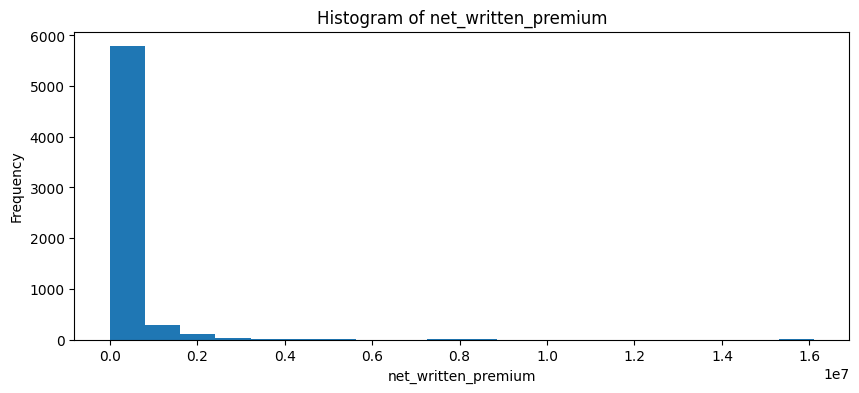

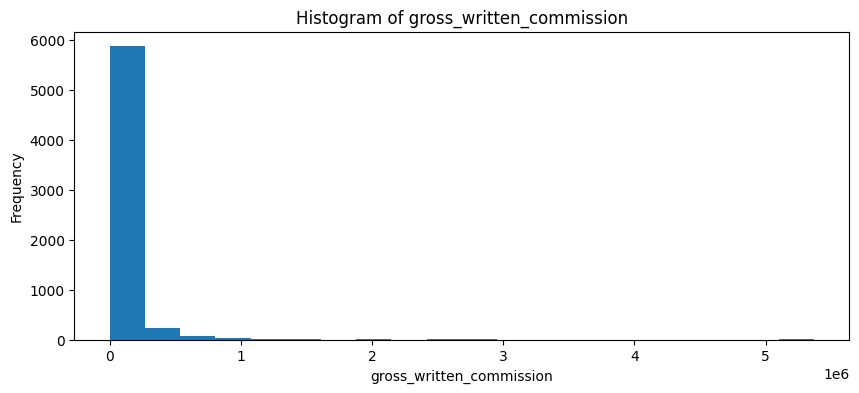

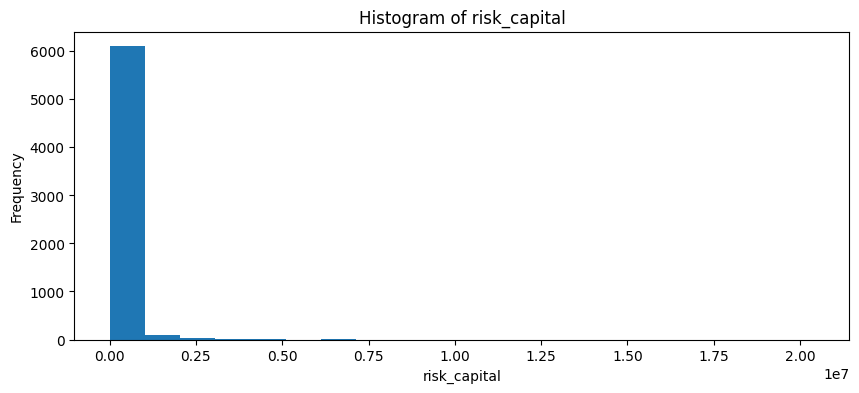

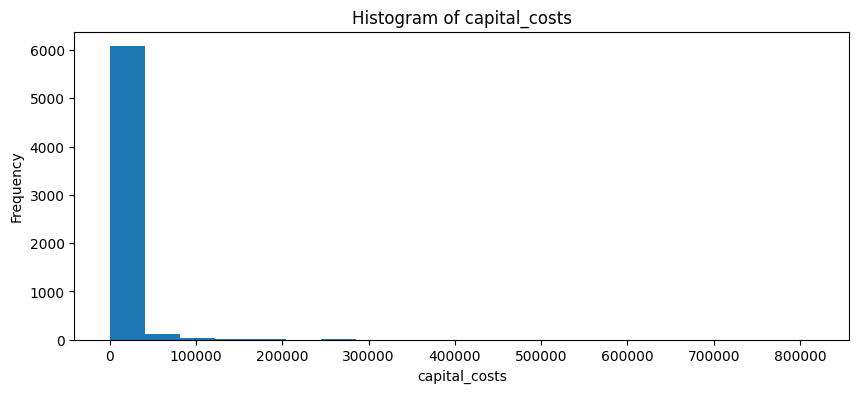

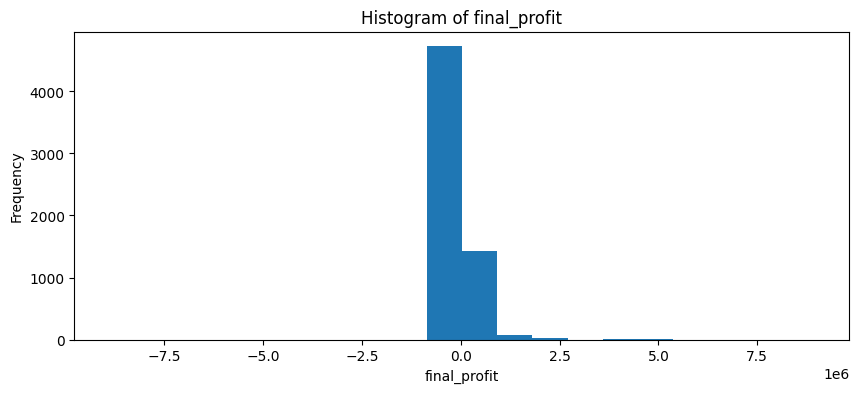

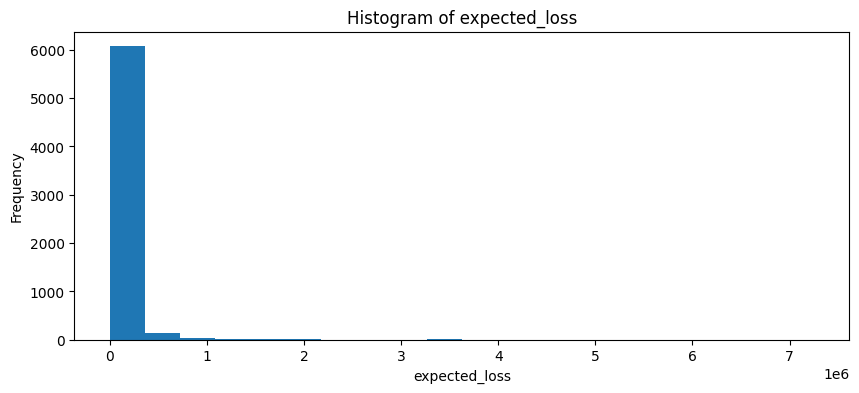

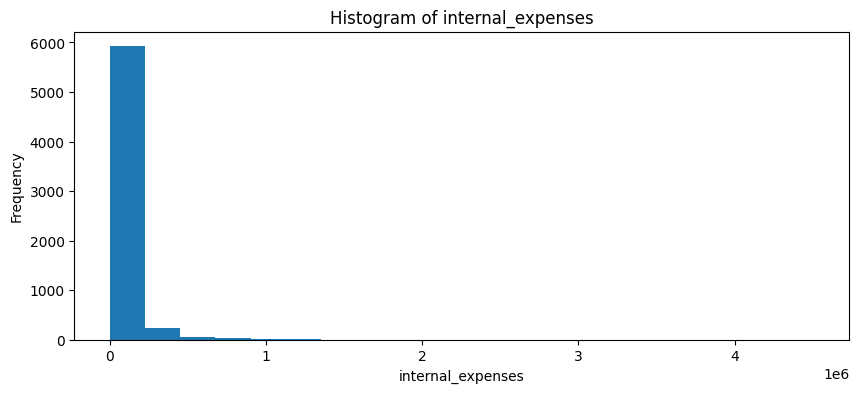

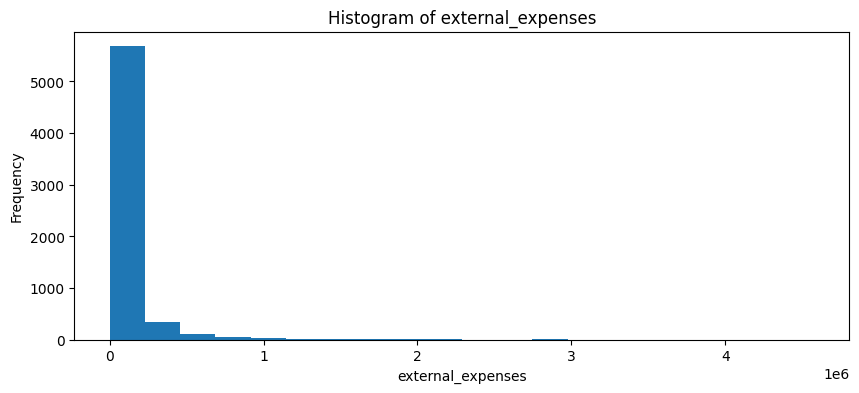

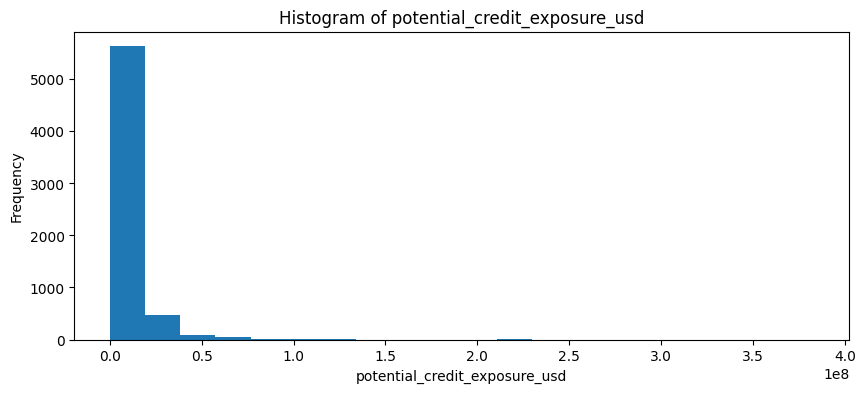

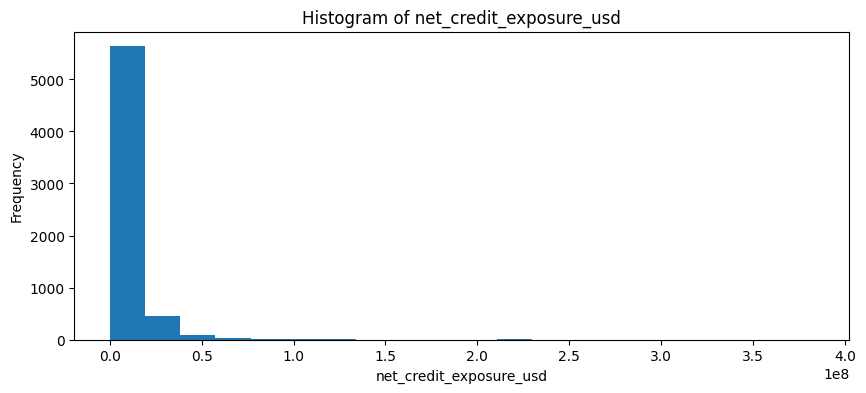

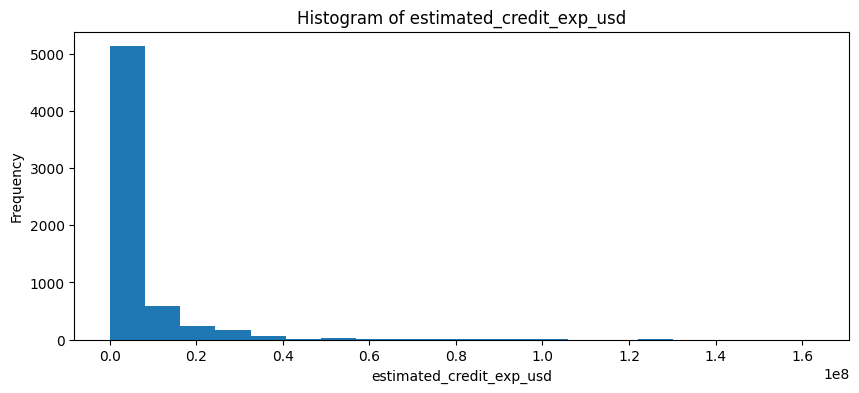

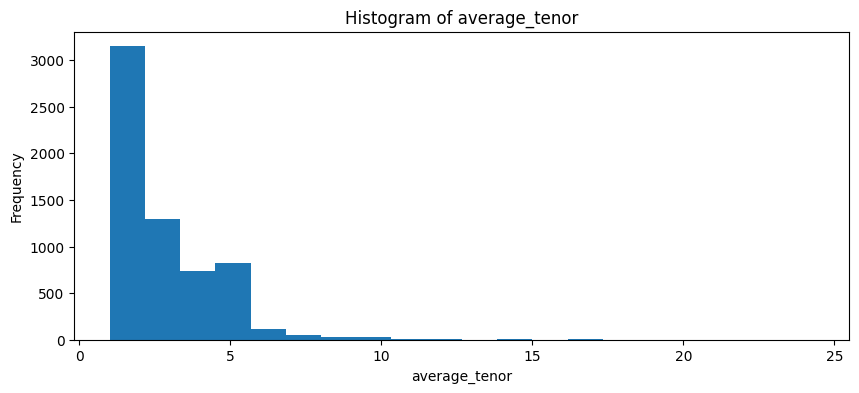

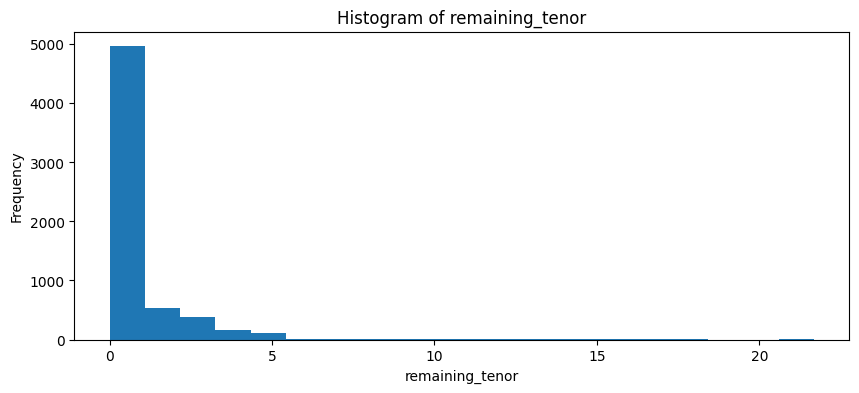

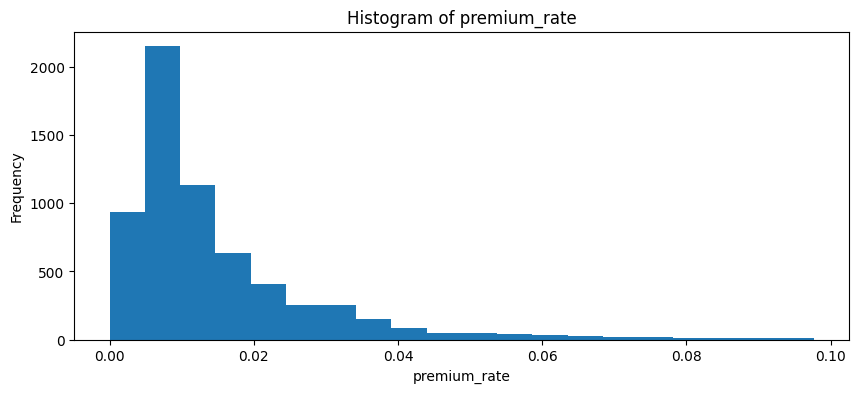

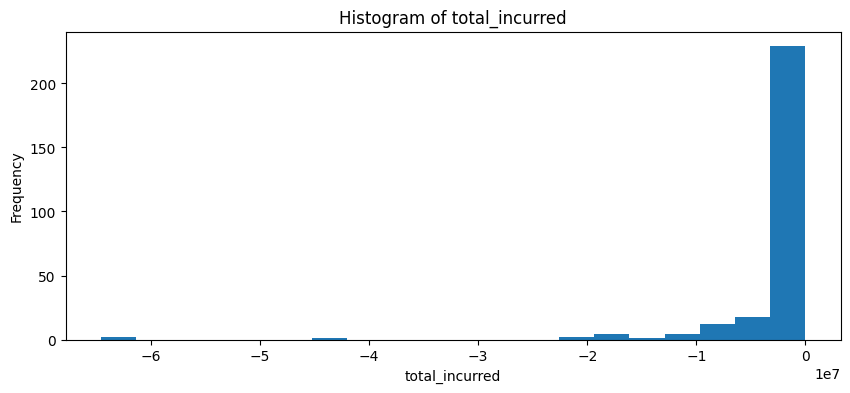

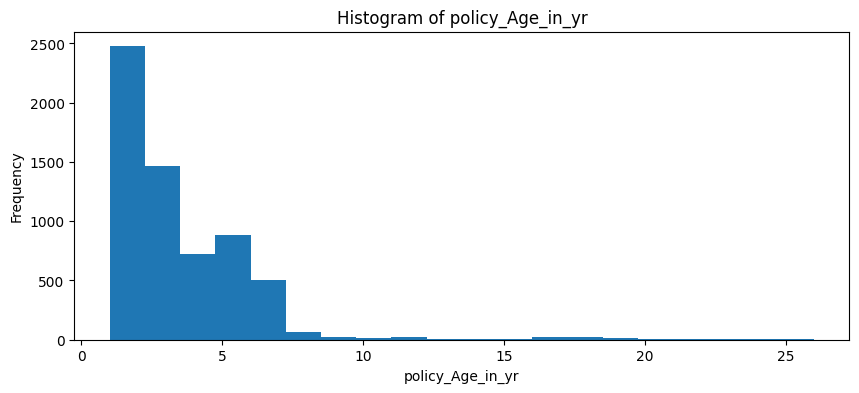

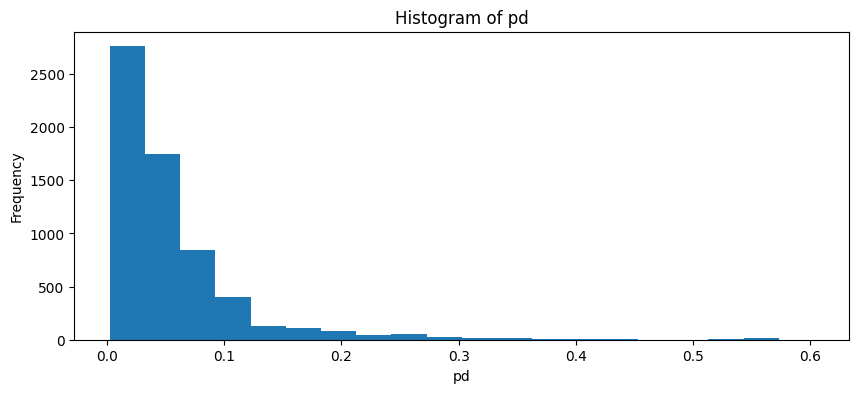

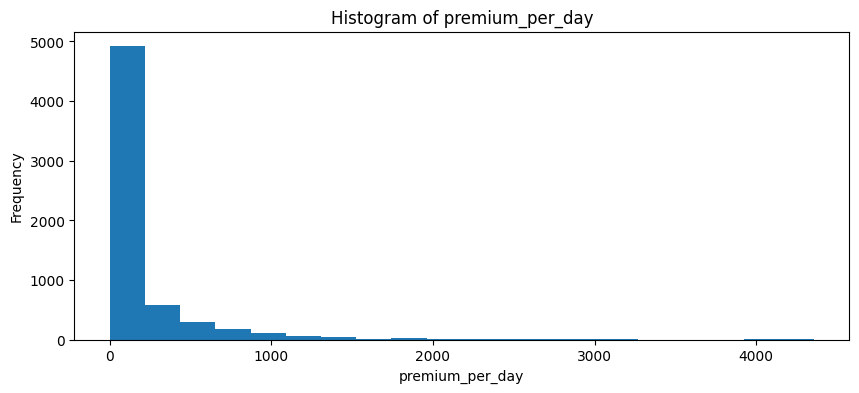

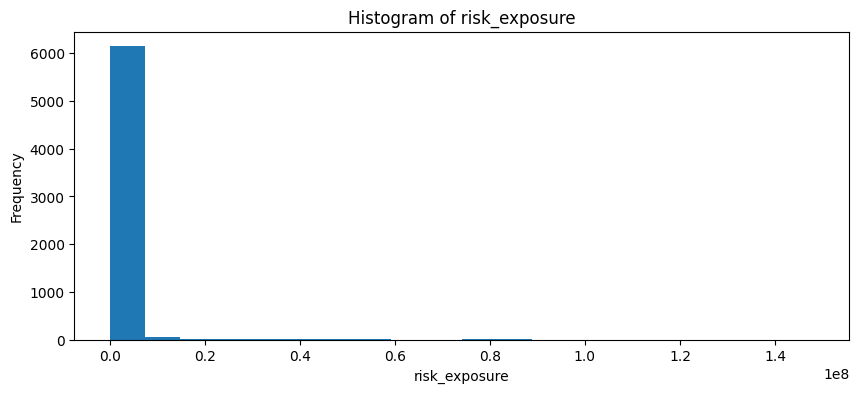

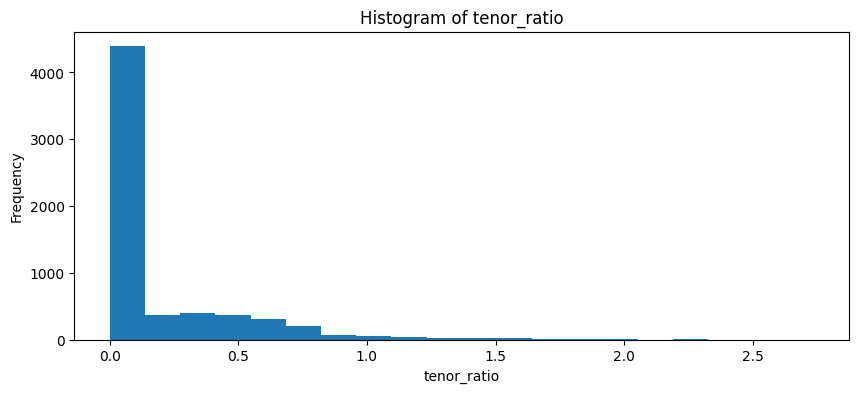

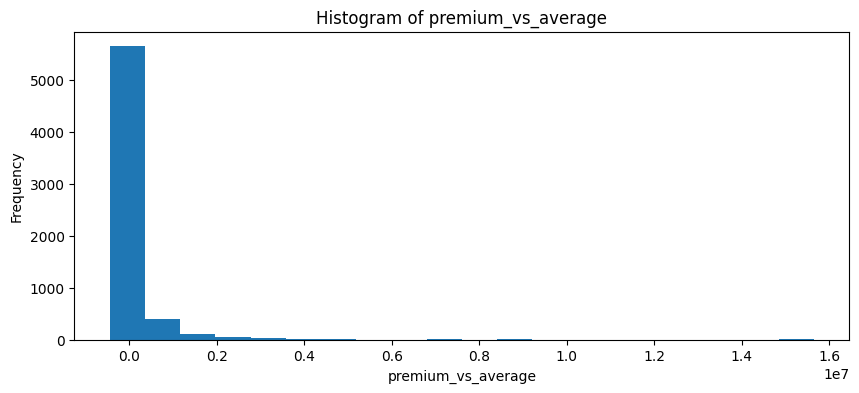

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
numerical_features=['policy_term_in_days', 'gross_written_premium', 'net_written_premium',
       'gross_written_commission', 'risk_capital', 'capital_costs',
       'final_profit', 'expected_loss', 'internal_expenses',
       'external_expenses', 'potential_credit_exposure_usd',
       'net_credit_exposure_usd', 'estimated_credit_exp_usd', 'average_tenor',
       'remaining_tenor', 'premium_rate', 'total_incurred','policy_Age_in_yr','pd', 'premium_per_day',
       'risk_exposure', 'tenor_ratio', 'premium_vs_average']

numerical_data = merged_df[numerical_features]
for column in numerical_data.columns:
    plt.figure(figsize=(10, 4))
    plt.hist(numerical_data[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


List of Categorical Features:
['an_policy_key', 'transaction_id', 'source_system', 'insured_id', 'industry_segment', 'country_code', 'new_renewed', 'costing_rating', 'pd']


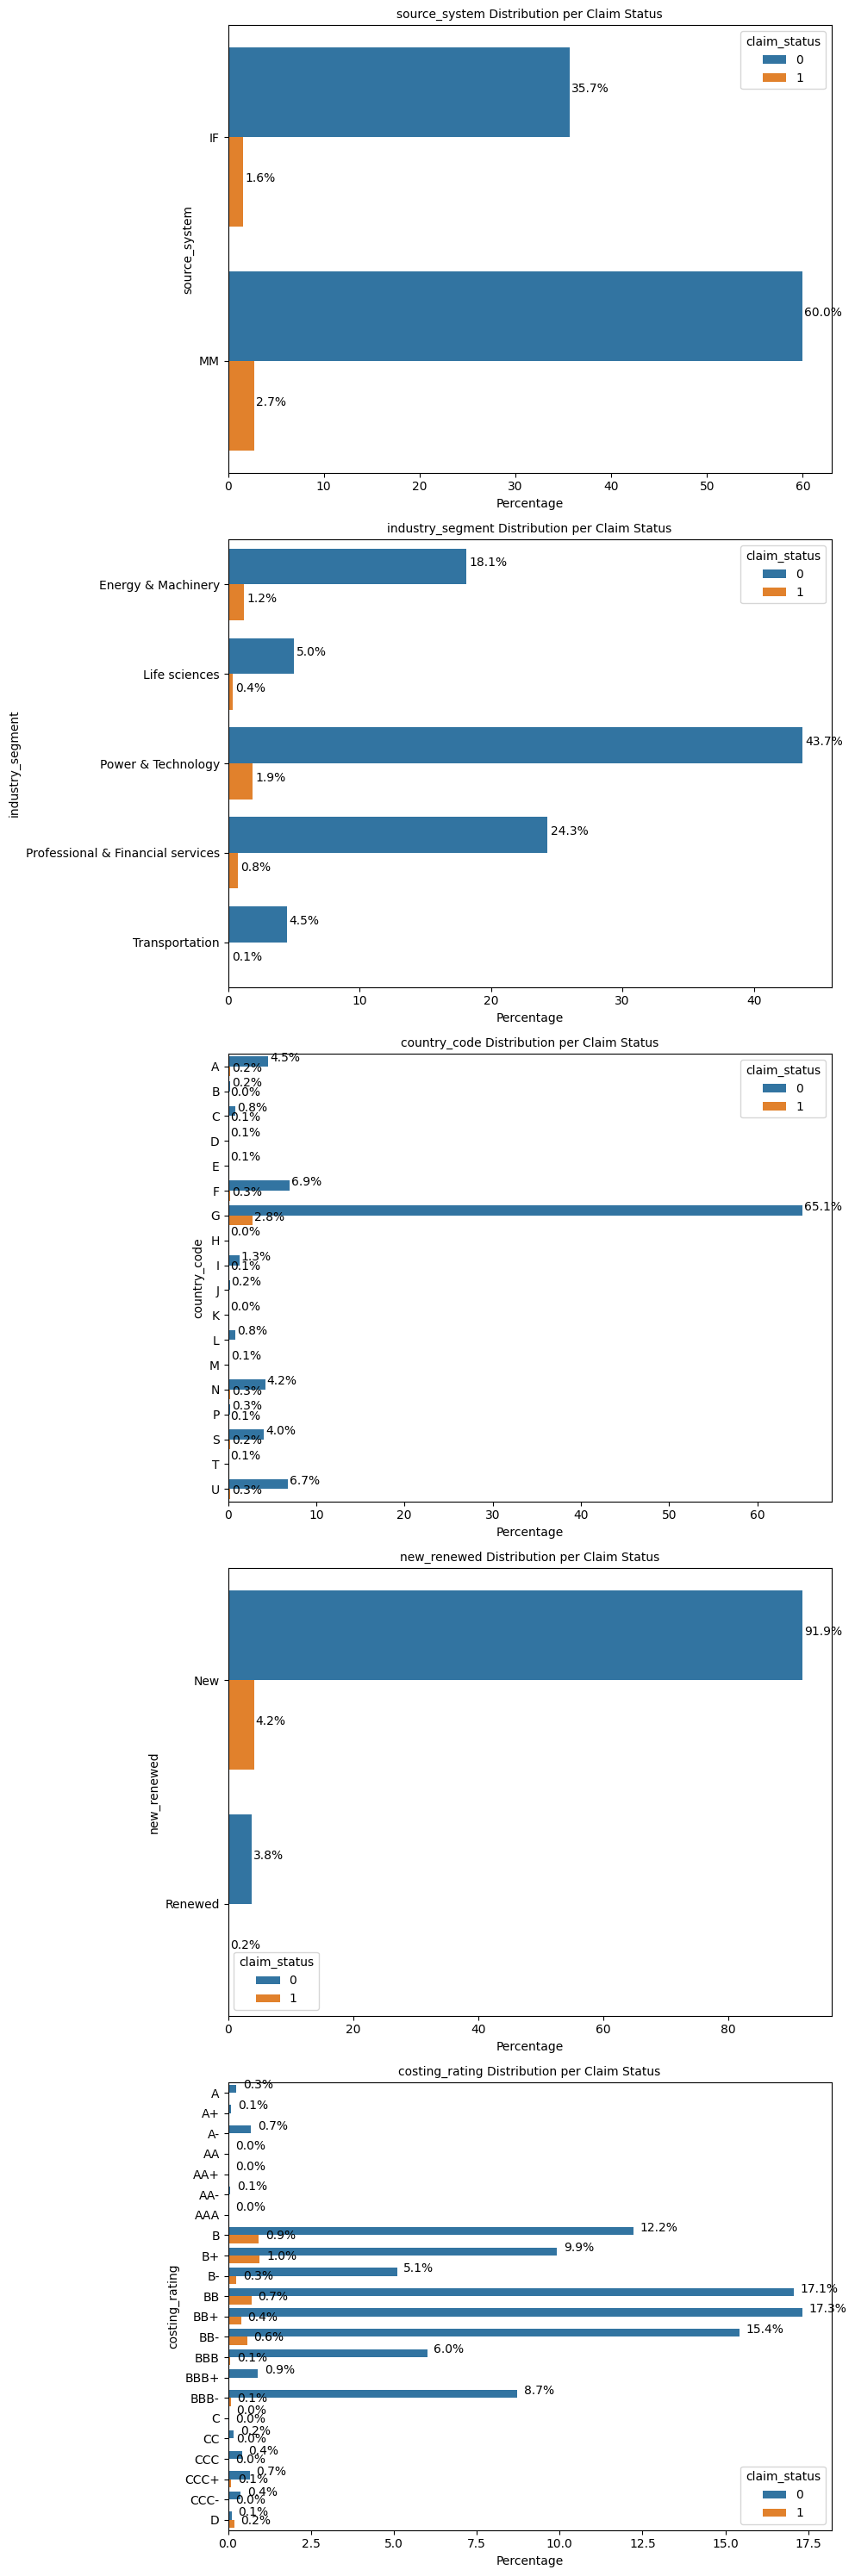

In [200]:
categorical_features = merged_df.select_dtypes(include='object').columns.tolist()
print("List of Categorical Features:")
print(categorical_features)

features = ['source_system', 'industry_segment', 'country_code', 'new_renewed', 'costing_rating']
num_rows = len(features)
num_cols = 1
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6 * num_rows))
for i, col in enumerate(features):
    percentage_df = (merged_df.groupby([col, 'claim_status']).size() / merged_df.shape[0] * 100).reset_index(name='percentage')
    sns.barplot(data=percentage_df, x='percentage', y=col, hue='claim_status', ax=axes[i])
    axes[i].set_title(f'{col} Distribution per Claim Status', fontdict={'size': 10})
    axes[i].set_xlabel('Percentage')
    axes[i].set_ylabel(col)
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x = p.get_x() + width + 0.2
        y = p.get_y() + height / 2
        axes[i].annotate(f'{width:.1f}%', (x, y))
plt.tight_layout()
plt.show()


### 1. What is the total incurred claim amount from the policies that were incepted before 2016?

In [201]:
merged_df[merged_df['inception_date']<'2016-01-01']['total_incurred'].sum()

-327545090.6289256

### 2. Which industry segment has highest and lowest percentage of claims from the given historical data?

In [68]:
claim_per_industry = merged_df.groupby('industry_segment')['total_incurred'].sum()
claim_per_industry = claim_per_industry / claim_per_industry.sum() * 100
max_claim_industry = claim_per_industry.idxmax()
print("Industry sector which have highest claim: ",max_claim_industry)
min_claim_industry = claim_per_industry.idxmin()
print("Industry sector which have lowest claim: ",min_claim_industry)

Industry sector which have highest claim:  Professional & Financial services
Industry sector which have lowest claim:  Transportation


### 3. Estimate the correct PD for each transaction given the ratings and PD matrix.

In [202]:
print("Probability of defaulter(pd) of each transaction is:")
print(merged_df[['transaction_id','costing_rating','pd']])

Probability of defaulter(pd) of each transaction is:
       transaction_id costing_rating        pd
0               10036            BB-  0.078015
1               10040             BB  0.025862
2               10376            BB-   0.03622
3               10398            BB+  0.069485
4               10457              B  0.074195
...               ...            ...       ...
6277  03-1034101076-8            BB+  0.021689
6278  03-1034094509-0            BB+  0.035871
6279  03-1034091578-3            BB-  0.019525
6280  03-1034103633-7            BB-  0.019525
6281  03-1034103634-6            BB-  0.019525

[6262 rows x 3 columns]


In [203]:
merged_df['remaining_tenor']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
6277    0.727616
6278    1.637808
6279    0.000000
6280    0.000000
6281    0.000000
Name: remaining_tenor, Length: 6262, dtype: float64

In [204]:
merged_df['policy_Age_in_yr']

0       5
1       3
2       3
3       6
4       3
       ..
6277    3
6278    4
6279    2
6280    2
6281    2
Name: policy_Age_in_yr, Length: 6262, dtype: int64

In [205]:
def actual_pd(df):
  df['actual_pd'] = 0
  for index, row in df.iterrows():
      policy_tenor_in_yr = row['policy_Age_in_yr']
      spend_tenor_in_yr = row['spend_policy_tenor']
      col_name1 = f'Cumulative_PD_{policy_tenor_in_yr}_year'
      if spend_tenor_in_yr == 0:
        df.at[index, 'actual_pd'] = row[col_name1]
        continue
      col_name2 = f'Cumulative_PD_{spend_tenor_in_yr}_year'
      df.at[index, 'actual_pd'] = row[col_name1]-row[col_name2]
  return df
merged_df['policy_term_in_yrs'] = merged_df['policy_term_in_days'].apply(lambda x: x/365)
merged_df['spend_policy_tenor']=merged_df['policy_term_in_yrs']-merged_df['remaining_tenor']
merged_df['spend_policy_tenor']=merged_df['spend_policy_tenor'].apply(lambda x: math.floor(x))
merged_df=actual_pd(merged_df)
print("Probability of defaulter(pd) of each transaction is:")
print(merged_df[['transaction_id','costing_rating','actual_pd']])

Probability of defaulter(pd) of each transaction is:
       transaction_id costing_rating  actual_pd
0               10036            BB-   0.022100
1               10040             BB   0.012771
2               10376            BB-   0.016695
3               10398            BB+   0.016658
4               10457              B   0.028457
...               ...            ...        ...
6277  03-1034101076-8            BB+   0.016770
6278  03-1034094509-0            BB+   0.030952
6279  03-1034091578-3            BB-   0.009858
6280  03-1034103633-7            BB-   0.009858
6281  03-1034103634-6            BB-   0.009858

[6262 rows x 3 columns]


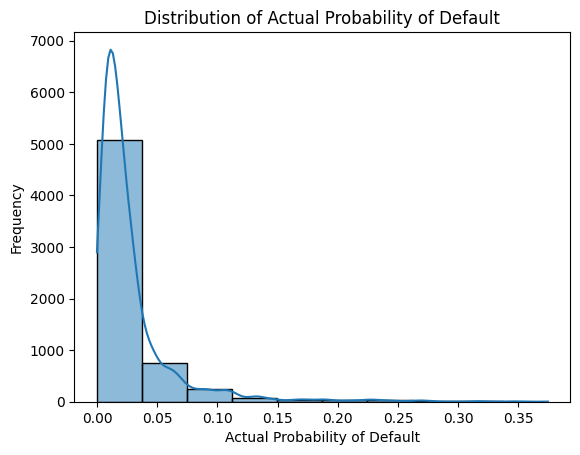

In [206]:
sns.histplot(data=merged_df, x='actual_pd', bins=10, kde=True)

plt.xlabel('Actual Probability of Default')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Probability of Default')
plt.show()

In [207]:
drop_columns = [col for col in merged_df.columns if col.startswith('Cumulative_PD_')]
merged_df = merged_df.drop(columns=drop_columns,axis=1)

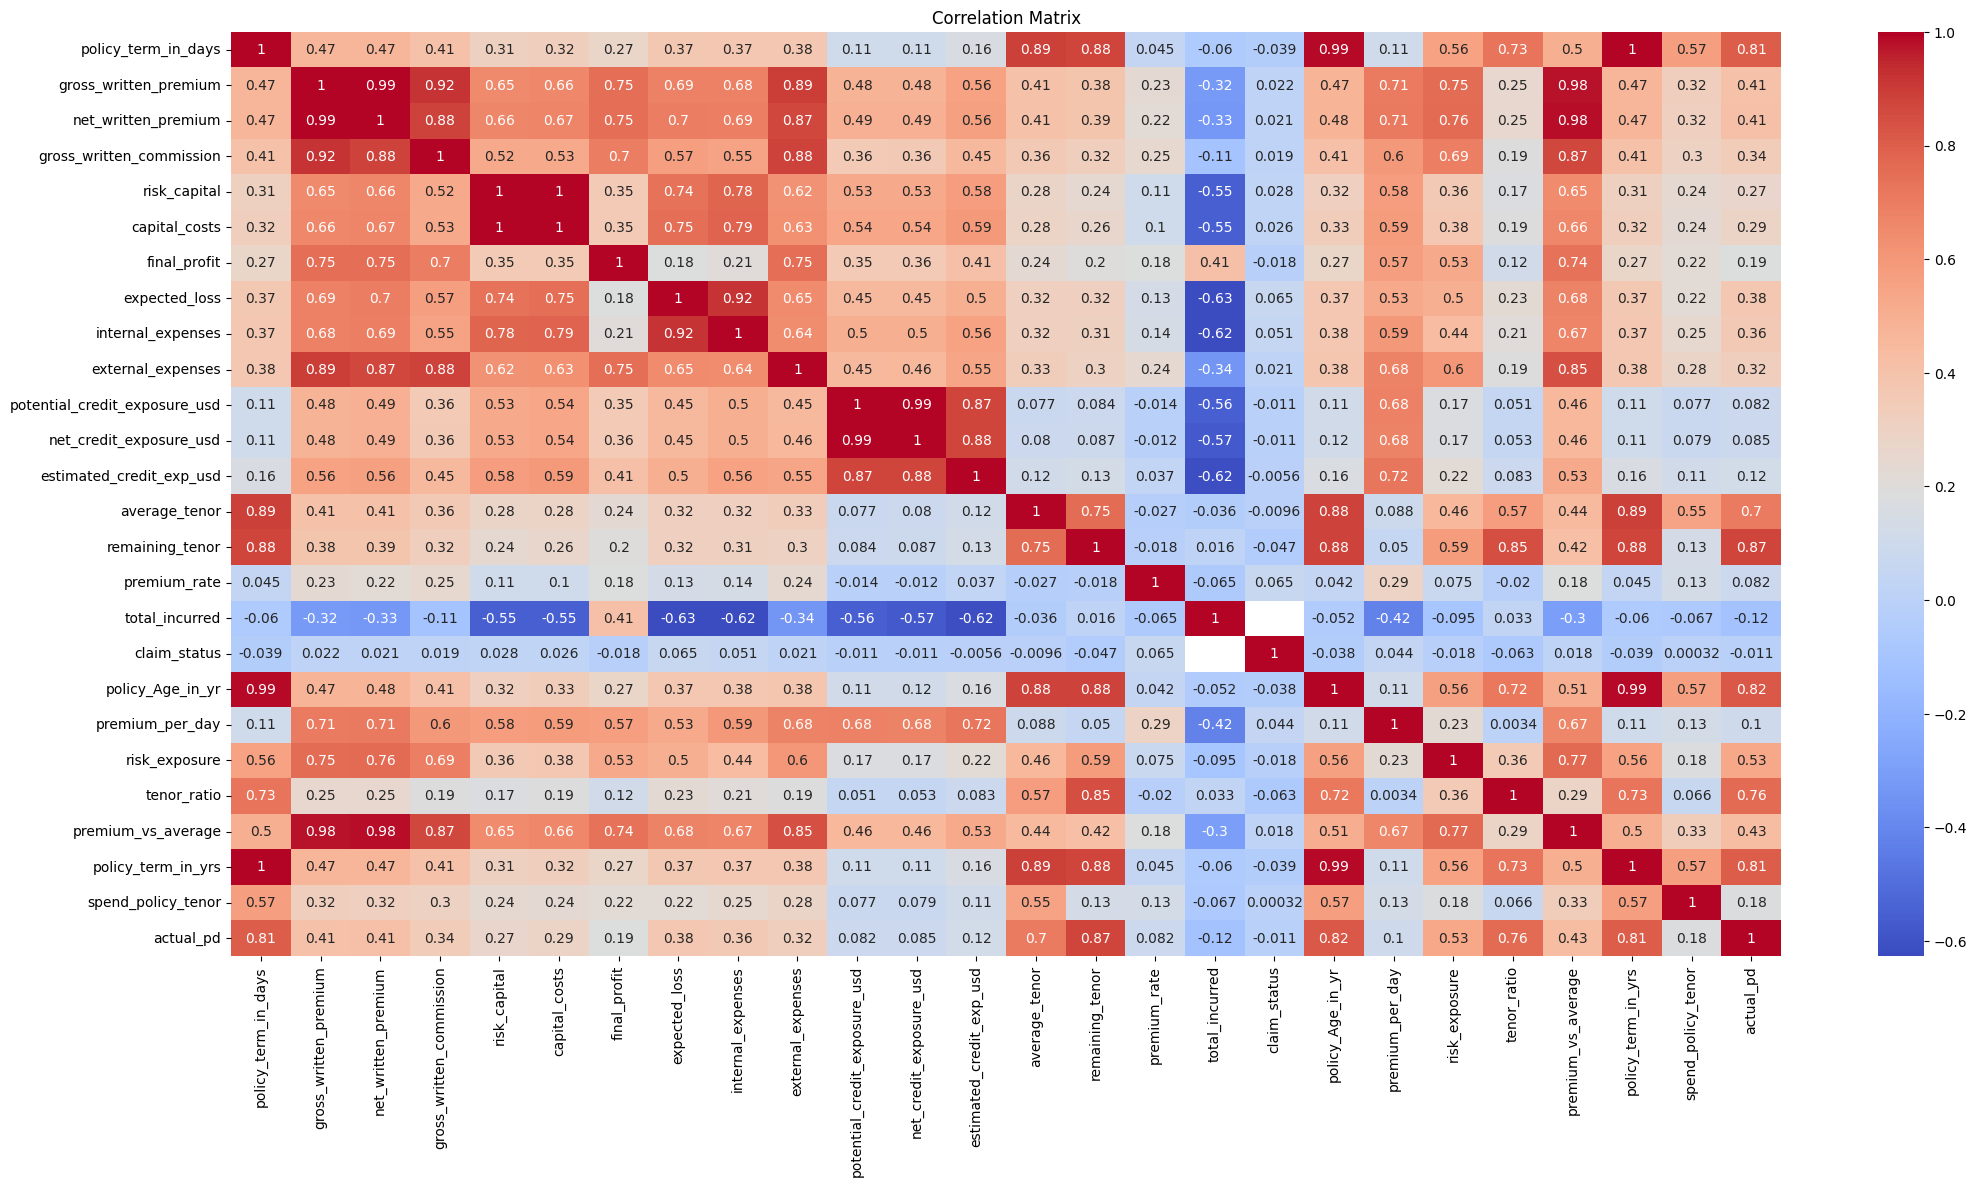

In [211]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = merged_df.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [212]:
import pandas as pd
target_column = 'claim_status'
correlation_with_target = merged_df.corr()[target_column]
print(correlation_with_target)

policy_term_in_days             -0.038558
gross_written_premium            0.021619
net_written_premium              0.021453
gross_written_commission         0.018528
risk_capital                     0.027939
capital_costs                    0.026450
final_profit                    -0.017588
expected_loss                    0.065067
internal_expenses                0.051027
external_expenses                0.020974
potential_credit_exposure_usd   -0.011335
net_credit_exposure_usd         -0.011390
estimated_credit_exp_usd        -0.005569
average_tenor                   -0.009578
remaining_tenor                 -0.046920
premium_rate                     0.064894
total_incurred                        NaN
claim_status                     1.000000
policy_Age_in_yr                -0.037708
premium_per_day                  0.044410
risk_exposure                   -0.018112
tenor_ratio                     -0.062765
premium_vs_average               0.017583
policy_term_in_yrs              -0

### Build Classification Model

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils import class_weight
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score,confusion_matrix, accuracy_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from warnings import filterwarnings
filterwarnings('ignore')


In [220]:
def plot_confusion(cm):
  plt.figure(figsize=(5, 1))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  # plt.title("Confusion Matrix")
  plt.show()

In [382]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    classification_reports = []
    model_scores = {}
    model_recall = {}
    model_f1 = {}
    model_precision = {}

    for name, model in models.items():
        model.fit(X_train,y_train)
        y_preds = model.predict(X_test)
        print("Model Name: ",name)
        print("Classification Report:")
        class_report=classification_report(y_test, y_preds)
        classification_reports.append(class_report)
        print(class_report)
        print("Confusion Matrix:\n")
        cm = confusion_matrix(y_test, y_preds)
        # print(cm)
        plot_confusion(cm)
        print("="*53)
        print('\n\n')
        model_scores[name] = model.score(X_test,y_test)
        model_recall[name] = recall_score(y_test, y_preds)
        model_f1[name] = f1_score(y_test, y_preds)
        model_precision[name] = precision_score(y_test, y_preds)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    model_recall = pd.DataFrame(model_recall, index=['Recall']).transpose()
    model_recall = model_recall.sort_values('Recall')
    model_f1 = pd.DataFrame(model_f1, index=['F1']).transpose()
    model_f1 = model_f1.sort_values('F1')
    model_precision = pd.DataFrame(model_precision, index=['Precision']).transpose()
    model_precision = model_precision.sort_values('Precision')

    return model_scores, model_recall, model_f1, model_precision, classification_reports

In [489]:
models = { 'LogisticRegression': LogisticRegression(penalty='l2',max_iter=10000),
           'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=2),
           'SVC': SVC(gamma='scale'),
           'DecisionTreeClassifier': DecisionTreeClassifier(criterion='gini',min_impurity_decrease=0.0),
           'RandomForestClassifier': RandomForestClassifier(n_estimators=400,max_samples=2000),
           'AdaBoostClassifier': AdaBoostClassifier(n_estimators=200,learning_rate=0.1),
           'XGBClassifier': XGBClassifier(objective='binary:logistic',eval_metric=['logloss'],n_estimators=100, learning_rate=0.3),
           'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate=0.01,n_estimators=50),
           'XGBRFClassifier': XGBRFClassifier(objective='binary:logistic',eval_metric=['logloss'],n_estimators=400,learning_rate=.01),
           'MultiLayer Perceptron':MLPClassifier(hidden_layer_sizes=(2,512),activation='relu',max_iter=100,learning_rate_init=0.1,early_stopping=True)
          }

No of data points in each class in training dataset Counter({0: 4791, 1: 4791})
No of data points in each class in test dataset Counter({0: 1198, 1: 55})
Model Name:  LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.63      0.77      1198
           1       0.07      0.60      0.12        55

    accuracy                           0.63      1253
   macro avg       0.52      0.62      0.45      1253
weighted avg       0.93      0.63      0.74      1253

Confusion Matrix:



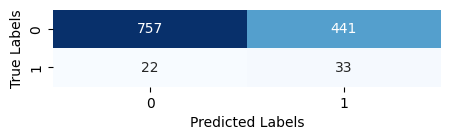




Model Name:  KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1198
           1       0.19      0.45      0.27        55

    accuracy                           0.89      1253
   macro avg       0.58      0.68      0.60      1253
weighted avg       0.94      0.89      0.91      1253

Confusion Matrix:



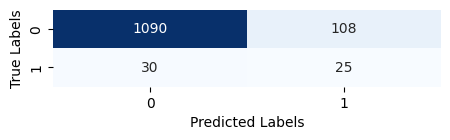




Model Name:  SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1198
           1       0.08      0.58      0.15        55

    accuracy                           0.70      1253
   macro avg       0.53      0.65      0.48      1253
weighted avg       0.93      0.70      0.79      1253

Confusion Matrix:



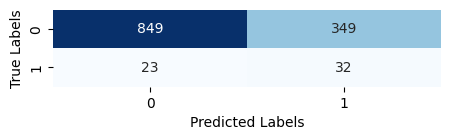




Model Name:  DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1198
           1       0.26      0.27      0.27        55

    accuracy                           0.93      1253
   macro avg       0.61      0.62      0.62      1253
weighted avg       0.94      0.93      0.93      1253

Confusion Matrix:



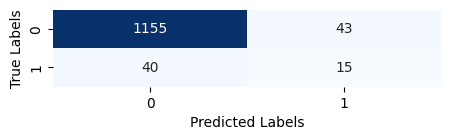




Model Name:  RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1198
           1       0.35      0.33      0.34        55

    accuracy                           0.94      1253
   macro avg       0.66      0.65      0.66      1253
weighted avg       0.94      0.94      0.94      1253

Confusion Matrix:



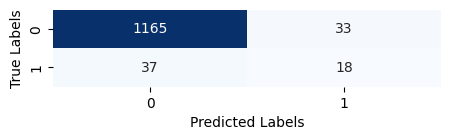




Model Name:  AdaBoostClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1198
           1       0.10      0.60      0.17        55

    accuracy                           0.74      1253
   macro avg       0.54      0.67      0.51      1253
weighted avg       0.94      0.74      0.82      1253

Confusion Matrix:



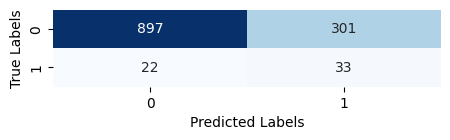




Model Name:  XGBClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1198
           1       0.52      0.25      0.34        55

    accuracy                           0.96      1253
   macro avg       0.74      0.62      0.66      1253
weighted avg       0.95      0.96      0.95      1253

Confusion Matrix:



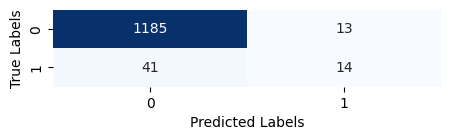




Model Name:  GradientBoostingClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.54      0.70      1198
           1       0.08      0.85      0.14        55

    accuracy                           0.55      1253
   macro avg       0.53      0.70      0.42      1253
weighted avg       0.95      0.55      0.67      1253

Confusion Matrix:



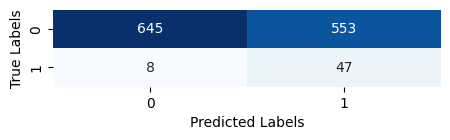




Model Name:  XGBRFClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1198
           1       0.13      0.82      0.22        55

    accuracy                           0.75      1253
   macro avg       0.56      0.78      0.53      1253
weighted avg       0.95      0.75      0.82      1253

Confusion Matrix:



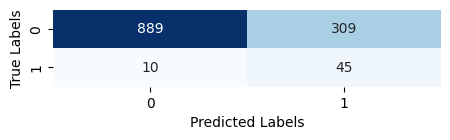




Model Name:  MultiLayer Perceptron
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.46      0.63      1198
           1       0.07      0.82      0.12        55

    accuracy                           0.48      1253
   macro avg       0.52      0.64      0.38      1253
weighted avg       0.94      0.48      0.61      1253

Confusion Matrix:



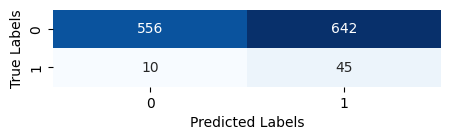

In [490]:
X = merged_df[['industry_segment',  'new_renewed','policy_term_in_days',
               'gross_written_premium', 'net_written_premium',
               'gross_written_commission', 'risk_capital', 'capital_costs',
               'final_profit', 'expected_loss', 'internal_expenses',
               'external_expenses', 'potential_credit_exposure_usd',
               'net_credit_exposure_usd', 'estimated_credit_exp_usd', 'premium_rate',
               'costing_rating',  'pd', 'premium_per_day','risk_exposure',
               'tenor_ratio', 'premium_vs_average','spend_policy_tenor']]
y = merged_df[['claim_status']]
label_encoder = preprocessing.LabelEncoder()
cat_features = ['industry_segment',  'new_renewed','costing_rating']
for cat in cat_features:
  X[cat]= label_encoder.fit_transform(X[cat])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=40)
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

target_column_name = 'claim_status'
over_df = pd.concat([X_train, y_train],axis=1)
majority_class = over_df[over_df[target_column_name] == 0]
minority_class = over_df[over_df[target_column_name] == 1]
oversampled_minority = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
oversampled_df = pd.concat([majority_class, oversampled_minority])

y_train=oversampled_df['claim_status']
X_train=oversampled_df.drop('claim_status',axis=1)
print("No of data points in each class in training dataset",Counter(list(y_train)))
print("No of data points in each class in test dataset",Counter(list(y_test['claim_status'])))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model_scores, model_recall, model_f1, model_precision,classification_reports = fit_and_score(models, X_train, X_test, y_train, y_test)

In [491]:
concatenated_df = model_recall.merge(model_precision, left_index=True, right_index=True, how='inner').merge(model_f1, left_index=True, right_index=True, how='inner').merge(model_scores, left_index=True, right_index=True, how='inner')
concatenated_df.sort_values(by='Recall',ascending=False,inplace=True)
concatenated_df

,Recall,Precision,F1,Score
GradientBoostingClassifier,0.854545,0.078333,0.143511,0.552275
XGBRFClassifier,0.818182,0.127119,0.220049,0.745411
MultiLayer Perceptron,0.818182,0.065502,0.121294,0.479649
LogisticRegression,0.600000,0.069620,0.124764,0.630487
AdaBoostClassifier,0.600000,0.098802,0.169666,0.742219
SVC,0.581818,0.083990,0.146789,0.703113
KNeighborsClassifier,0.454545,0.187970,0.265957,0.889864
RandomForestClassifier,0.327273,0.352941,0.339623,0.944134
DecisionTreeClassifier,0.272727,0.258621,0.265487,0.933759
XGBClassifier,0.254545,0.518519,0.341463,0.956903
